Simple notebook to create hydrographs from HOB output and HYDMOD output

Begin by importing the HobsOut and HydModOut modules and setting up files to read

In [1]:
from hobs_output import HobsOut
from hydmod_output import HydModOut
import matplotlib.pyplot as plt
import os

ws = "."
hobs = "Hobs.out"
hydmod = "Hydmod.out"

Load data using the HobsOut and HydModOut modules and set a start date for hydmod and the model's ITMUNI

In [2]:
hobs = HobsOut(os.path.join(ws, hobs))
hydmod = HydModOut(os.path.join(ws, hydmod))

dt = hydmod.date_time('12-31-1941', itmuni='days')

Define a filter for data processing and plotting that can be passed in many of the HobsOut methods.

True means the observation will be filtered out and not considered

In [3]:
def filter(obsname):
    if obsname.endswith("D"):
        return True
    elif obsname in ("04N01E23K01S",
                     "04N01E23K02S",
                     "04N01E23R01S"):
        return True
    return False


Let's look at the observations available in the HobsOut object

In [4]:
hobs.keys()


dict_keys(['04N01E04N01S', '04N01E05G02S', '04N01E06H01S', '04N01E06N02S', '04N01E07C01S', '04N01E07D01S', '04N01E07K01S', '04N01E07P02S', '04N01E07P03S', '04N01E08P03S', '04N01E09C01S', '04N01E09D04S', '04N01E09N01S', '04N01E12R01S', '04N01E13E01S', '04N01E14Q01S', '04N01E15R01S', '04N01E16N01S', '04N01E16N02S', '04N01E17L01S', '04N01E17Q01S', '04N01E18C02S', '04N01E20E01S', '04N01E22A01S', '04N01E23K01S', '04N01E23K02S', '04N01E23R01S', '04N01E27D01S', '04N01E28F01S', '04N01W01H01S', '04N01W01P03S', '04N01W01P04S', '04N01W01R03S', '04N01W01R04S', '04N01W01R05S', '04N01W01R07S', '04N01W01R08S', '04N01W01R09S', '04N01W02G02S', '04N01W11B04S', '04N01W11B05S', '04N01W11J01S', '04N01W12H01S', '04N01W13C02S', '04N01W13R01S', '04N01W13R02S', '04N01W13R03S', '05N01E08N03S', '05N01E08N04S', '05N01E15C01S', '05N01E17Q01S', '05N01E20N01S', '05N01E21R01S', '05N01E22H01S', '05N01E27D01S', '05N01E27M01S', '05N01E28D01S', '05N01E32B02S', '05N01E32D01S', '05N01E35F01S', '05N01E35F03S', '05N01W25G01S

Now lets plot a hydrograph!

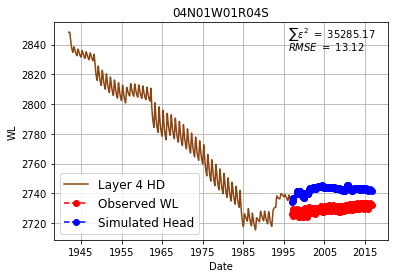

In [5]:
fig, ax = plt.subplots()
ax = hydmod.plot("04N01W01R04S", lw=1.5, strip_initial=True, ax=ax)
ax = hobs.plot("04N01W01R04S", "o--", ax=ax)

# get the sum of square error and RMSE and add them to the graph
sq_err = hobs.get_sum_squared_errors("04N01W01R04S")
rmse = hobs.get_rmse("04N01W01R04S")
ax.text(0.70, 0.93,
        r'$\sum \varepsilon^2\ =$ {:.2f}'.format(sq_err),
        transform=ax.transAxes)

ax.text(0.70, 0.87,
        r'$RMSE\ =$ {:.2f}'.format(rmse),
        transform=ax.transAxes)

# add a legend to the chart
ax.legend(loc=3, numpoints=1, fontsize=12)

# finally labels, title and add gridlines
plt.ylabel('WL')
plt.xlabel('Date')
plt.title("04N01W01R04S")
plt.grid(True)

Next let's grab the sum of sqaure errors and RMSE for the site

Text(0,0.5,'Simulated head, in feet')

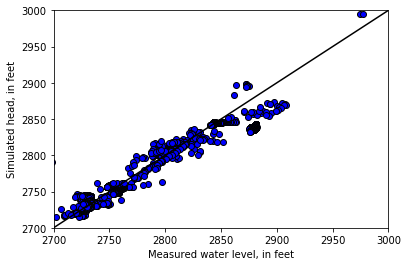

In [6]:

axes = hobs.plot_measured_vs_simulated(filter=filter)
lim = [2700, 3000]
axes.plot(lim, lim, 'k')
axes.set_ylim([2700, 3000])
axes.set_xlim([2700, 3000])
plt.xlabel("Measured water level, in feet")
plt.ylabel("Simulated head, in feet")

Let's add a legend and write the statistics to the hydrograph

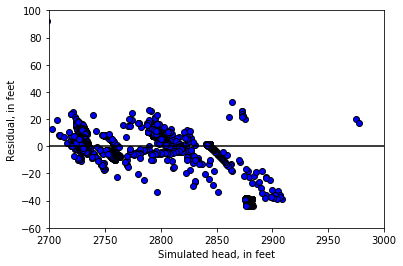

In [7]:
axes = hobs.plot_simulated_vs_residual(filter=filter)
axes.plot([2700, 3000], [0, 0], 'k')
axes.set_ylim([-60, 100])
axes.set_xlim([2700, 3000])
plt.xlabel("Simulated head, in feet")
plt.ylabel("Residual, in feet")
plt.show()

There is much more you can do with these tools. These are just the basics. Just ask--jlarsen@usgs.gov